In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.time import Time

import glob

%load_ext autoreload
%autoreload 2

%matplotlib inline

import modelStar

In [2]:
df = pd.read_csv("../data/filtered-data.csv")
om = modelStar.OffsetModel(df)

INFO:astropy:mag cut: 12.1936382, and 10th percentile
INFO:astropy:There are 1327 detections and 1534 non-detections;324 are bad.
INFO:astropy:yerr limit = 0.1


INFO: mag cut: 12.1936382, and 10th percentile [modelStar]
INFO: There are 1327 detections and 1534 non-detections;324 are bad. [modelStar]
INFO: yerr limit = 0.1 [modelStar]


In [3]:
samples = om.mcmc(nwalkers=200, nsamps=3000, burnin=1, threads=1,
        initialM=0.01, initialB=12., initialF=0.01, initialFu=0.01)

INFO:astropy:Calling EnsembleSampler.run_mcmc


INFO: Calling EnsembleSampler.run_mcmc [modelStar]


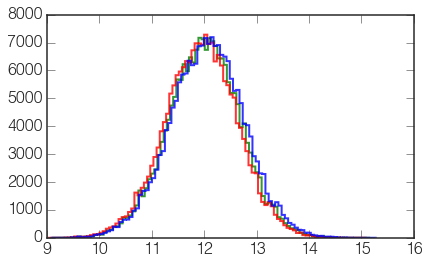

In [4]:
burnin = 2000
samples = om.sampler.chain[:, burnin:, :].reshape((-1, om.nSeries + 3))
_ = plt.hist(samples.T[1+1,:], bins=100, alpha=0.8, color='green', linewidth=2, histtype='step')
_ = plt.hist(samples.T[1+11,:], bins=100, alpha=0.8, color='red', linewidth=2, histtype='step')
_ = plt.hist(samples.T[1+4,:], bins=100, alpha=0.8, color='blue', linewidth=2, histtype='step')

In [5]:
s = np.argsort(np.bincount(om.series, ))[::-1]
np.argwhere(np.unique(om.series) == s[2])


array([[4]])

(-0.1, 0.2)

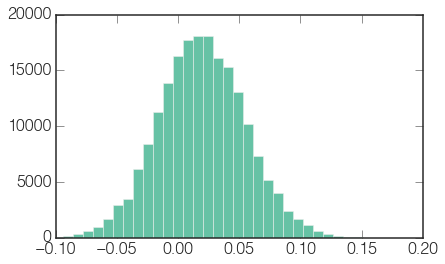

In [6]:
_ = plt.hist(samples.T[0,2000:] * 100.,bins=np.linspace(-0.2,0.2,50))
plt.xlim(-0.1,0.2)

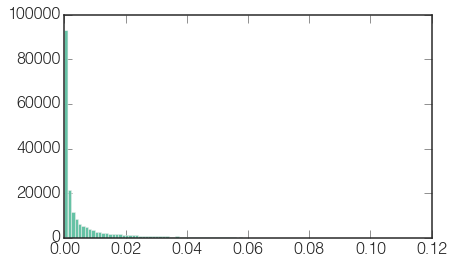

In [7]:
_ = plt.hist(np.e**samples.T[-1,2000:], bins=100)
#plt.xlim(-0.1,0.2)

(1889, 1993)

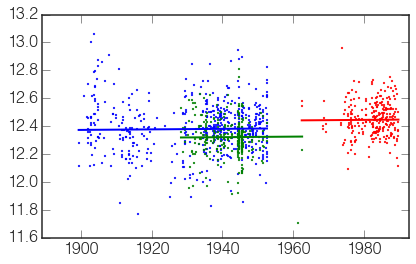

In [8]:
plt.scatter(om.x[om.series==2],om.y[om.series==2], color='b', s=3)
plt.scatter(om.x[om.series==11],om.y[om.series==11], color='r', s=3)
plt.scatter(om.x[om.series==31],om.y[om.series==31], color='g', s=3)
plt.plot(om.x[om.series==2],om.x[om.series==2]*np.median(samples.T[0,:])+np.median(samples.T[1+1,:]), lw=2, color='b')
plt.plot(om.x[om.series==11],om.x[om.series==11]*np.median(samples.T[0,:])+np.median(samples.T[1+4,:]), lw=2, color='r')
plt.plot(om.x[om.series==31],om.x[om.series==31]*np.median(samples.T[0,:])+np.median(samples.T[1+11,:]), lw=2, color='g')

plt.xlim(1889,1993)


In [16]:
# plt.scatter(om.x[om.series==2],om.y[om.series==2], color='b', s=3)
# plt.scatter(om.x[om.series==11],om.y[om.series==11], color='r', s=3)
# plt.scatter(om.x[om.series==31],om.y[om.series==31], color='g', s=3)
# pc = np.percentile(samples.T[1+1,:], [15.9,84.1])
# plt.fill_between(om.x[om.series==2],om.x[om.series==2]*np.median(samples.T[0,:])+np.median(samples.T[1+1,:]), lw=2, color='b')
# plt.plot(om.x[om.series==11],om.x[om.series==11]*np.median(samples.T[0,:])+np.median(samples.T[1+4,:]), lw=2, color='r')
# plt.plot(om.x[om.series==31],om.x[om.series==31]*np.median(samples.T[0,:])+np.median(samples.T[1+11,:]), lw=2, color='g')

# plt.xlim(1889,1993)


(12.4, 12.8)

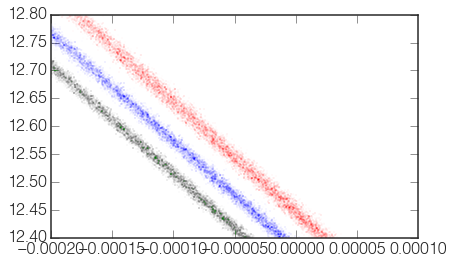

In [18]:
plt.scatter(samples.T[0,:], samples.T[1+1,:], s=1, alpha=0.01, color='b')
plt.scatter(samples.T[0,:], samples.T[1+4,:], s=1, alpha=0.01, color='r',)
plt.scatter(samples.T[0,:], samples.T[1+11,:], s=1, alpha=0.01, color='g',)
plt.xlim(-0.0002,0.0001)
plt.ylim(12.4,12.8)